In [1]:
import obspy
from obspy import read, UTCDateTime
import glob, os, pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NET = 'TG' ; STA = 'DDFL'
fmin = 0.05  ; fmax = 0.1
repicktime = '20180121_010642'
DATApath = f'/Volumes/home/Research/STEP/01_Split/DATA_SKS_Mw6/{NET}.{STA}'
Path = '/Volumes/home/Research/STEP/02_Station_result_csv/2015-2020_Mw6_100-140degree'

3    20180121_010642
Name: Event, dtype: object


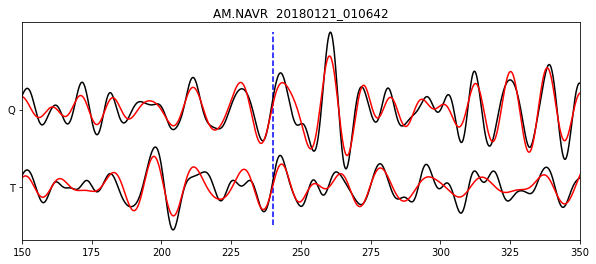

3    20180121_010642
Name: Event, dtype: object


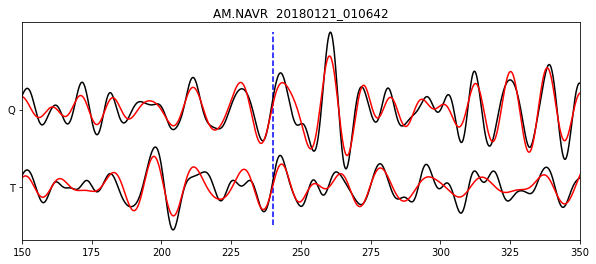

3    20180121_010642
Name: Event, dtype: object


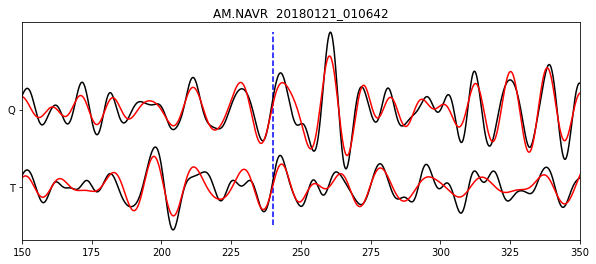

3    20180121_010642
Name: Event, dtype: object


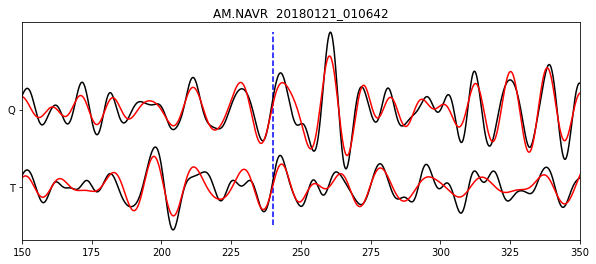

3    20180121_010642
Name: Event, dtype: object


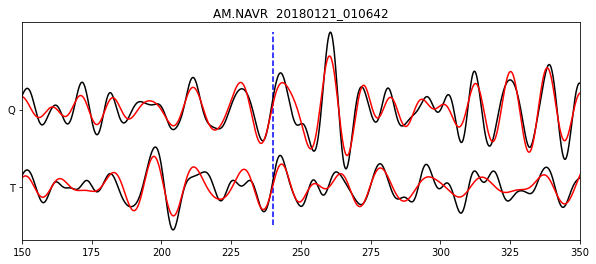

3    20180121_010642
Name: Event, dtype: object


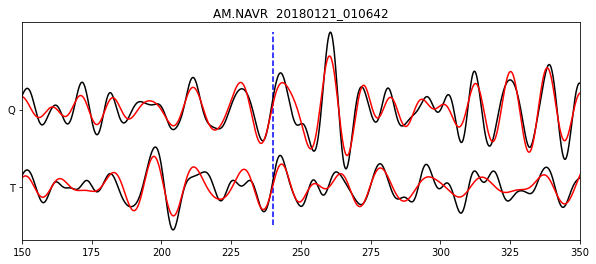

3    20180121_010642
Name: Event, dtype: object


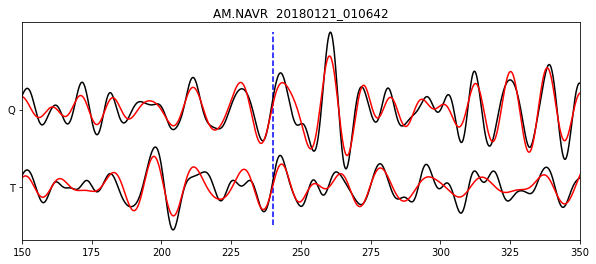

3    20180121_010642
Name: Event, dtype: object


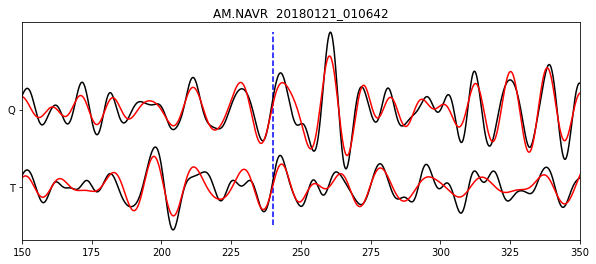

3    20180121_010642
Name: Event, dtype: object


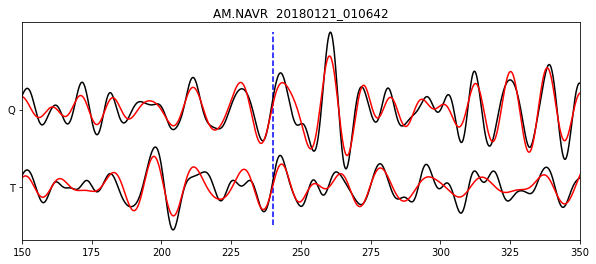

3    20180121_010642
Name: Event, dtype: object


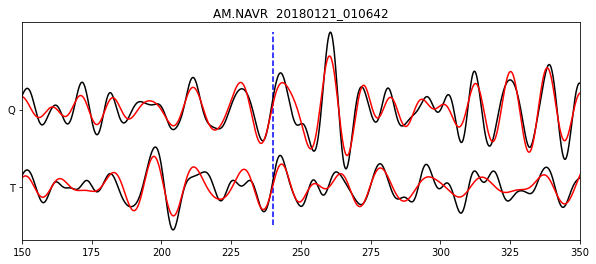

3    20180121_010642
Name: Event, dtype: object


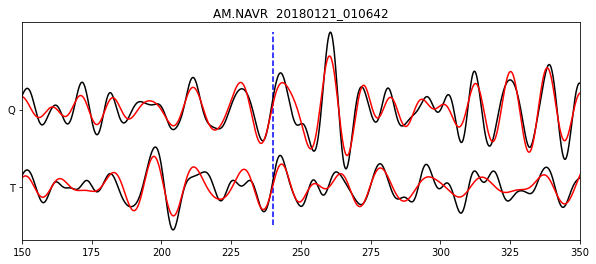

3    20180121_010642
Name: Event, dtype: object


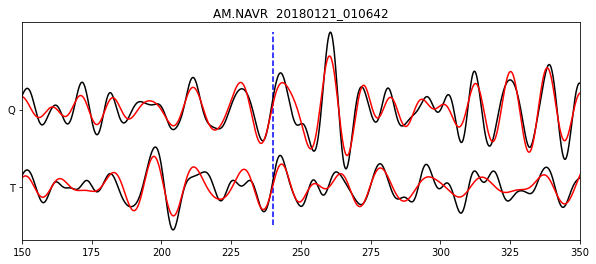

3    20180121_010642
Name: Event, dtype: object


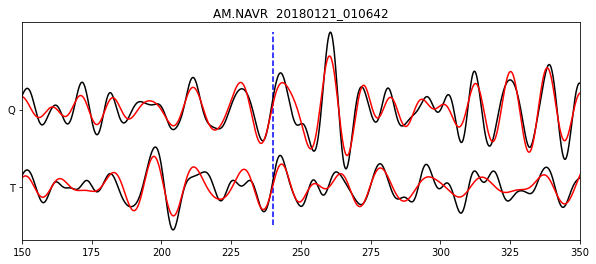

3    20180121_010642
Name: Event, dtype: object


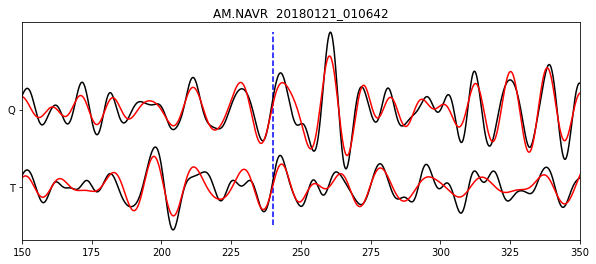

3    20180121_010642
Name: Event, dtype: object


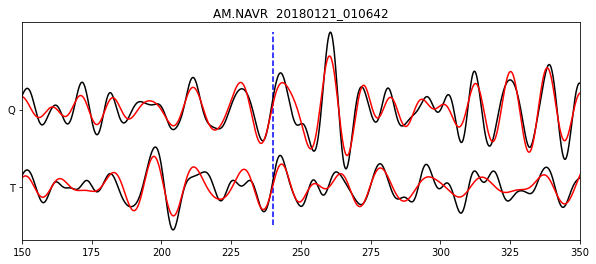

3    20180121_010642
Name: Event, dtype: object


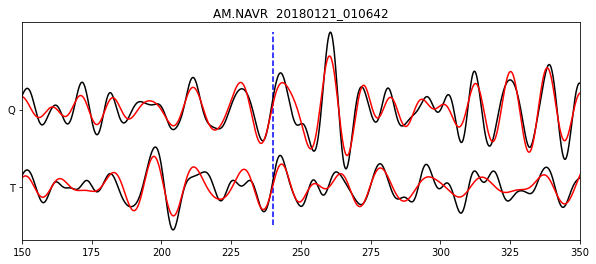

3    20180121_010642
Name: Event, dtype: object


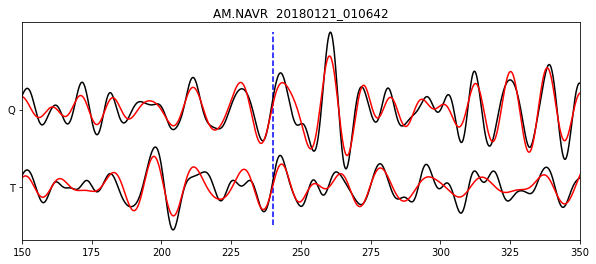

3    20180121_010642
Name: Event, dtype: object


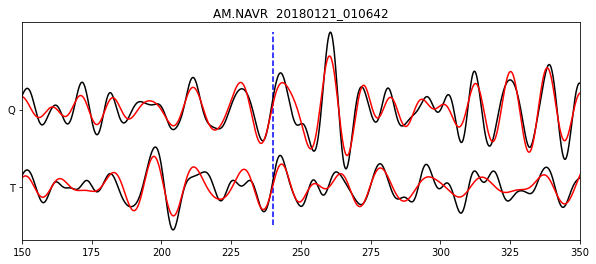

3    20180121_010642
Name: Event, dtype: object


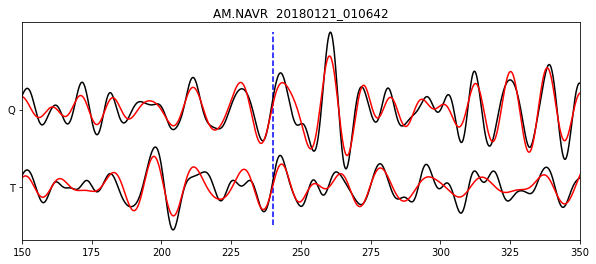

3    20180121_010642
Name: Event, dtype: object


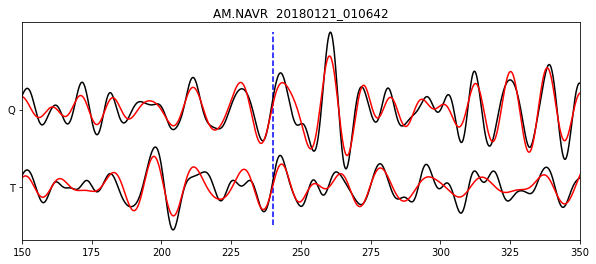

In [42]:
for csvpath in glob.glob(f'{Path}/{NET}*{STA}*.csv'):
    df = pd.read_csv(csvpath)
    pickdf = df[df['Event']==repicktime]
    for ii in pickdf :
        print(pickdf['Event'])
        evt = pickdf['Event'].values[0]
        PKL = glob.glob(f'{DATApath}/{evt}/LQT_data.pkl')[0]
        plt.figure(figsize=(10,4))
        st = pickle.load(open(PKL, "rb"))
        time = st[0].times()
        tr_Q = st.select(component='Q')[0].copy()
        tr_T = st.select(component='T')[0].copy()
        pmax = max(tr_Q.data)
        plt.vlines(x=240,ymin=-0.5,ymax=2,color='b',ls='--')
        plt.plot(time,tr_Q.data/pmax+1,'k')
        plt.plot(time,tr_T.data/pmax,'k')
        tr_Q_copy = tr_Q.copy()
        tr_T_copy = tr_T.copy()
#         tr_Q_copy.filter('lowpass',freq=fmax,corners=4,zerophase=True)
#         tr_T_copy.filter('lowpass',freq=fmax,corners=4,zerophase=True)
        tr_Q_copy.filter('bandpass',freqmin=fmin,freqmax=fmax,corners=4,zerophase=True)
        tr_T_copy.filter('bandpass',freqmin=fmin,freqmax=fmax,corners=4,zerophase=True)
        plt.plot(time,tr_Q_copy.data/pmax+1,'r')
        plt.plot(time,tr_T_copy.data/pmax,'r')
        plt.title(f'{NET}.{STA}  {evt}')
        plt.yticks(range(0,2),['T','Q'])
        plt.xlim(150,350)
        plt.show()
        

In [38]:
pickdf

NameError: name 'pickdf' is not defined

## check non-null date

In [3]:
def Calc_rho(RCdt, SCdt):
    rho = RCdt/SCdt 
    return rho
def Calc_Phi(RCPhi, SCPhi):
    Phi = max (abs(RCPhi-SCPhi), abs(SCPhi-RCPhi))
    if Phi > 90: Phi = 180 - Phi
    return Phi

In [5]:
NET = 'TG' ; STA = 'BATM'
Path    = '/Volumes/home/Research/STEP/02_Station_result_csv/'
phase   = 'SKS'
FigPath = f'/Volumes/home/Research/STEP/01_Split/DATA_{phase}*'

for csvpath in glob.glob(f'{Path}/*/{NET}.{STA}*csv'):
    df = pd.read_csv(csvpath)
    df = df[df['Phase']==phase][df['SNRQ']>=5][df['Pick']==True]
    
    for i in range(len(df)):
        RCPhi = df['RCPhi'].values[i]
        RCdt  = df['RCdt'].values[i]
        SCPhi = df['SCPhi'].values[i]
        SCdt  = df['SCdt'].values[i]

        rho = Calc_rho(RCdt, SCdt)
        phi = Calc_Phi(RCPhi, SCPhi)
        if 30 < phi < 68 or df["CpH"].values[i] >= 0.77: pass
        else: 
            if 0.8 < rho < 1.1 and phi < 8:   ## non-null good condition 

                print(f'{STA} Quality Good')
                evtTime = df["Event"].values[i]
                print(f'{STA} {evtTime}')
            elif 0.7 <= rho < 1.2 and phi <=25: ## non-null FAIR condition 
                print(f'{STA} Quality FAIR')
                evtTime = df["Event"].values[i]
                print(f'{STA} {evtTime}')
            cmd = f"open %(FigPath)s/%(NET)s.%(STA)s/%(evtTime)s/*manual.png" %locals()
            os.system(cmd)
    

BATM Quality FAIR
BATM 20140412_201438
